# load splines + function for getting event weight

In [1]:
import pickle
with open('interp_nutau_xsec.pckl', 'rb') as fl:
    interp_dict = pickle.load(fl, encoding='latin1')
    
def get_weight_nutau_xsec(E, nu, scale = 0):
    
    # nu can be 'NuTau' or 'NuTauBar'
    # scale should be in range [-1,1] 
    # scale=0 corresponds to nominal value (w=1)
    
    if nu not in ['NuTau', 'NuTauBar']:
        print ("'nu' argument should be equal to 'NuTau' or 'NuTauBar'. It's not. Returning 1.")
        return 1
    
    if scale < -1. or scale > 1.:
        print ("'scale' argument should be in range [-1, 1]. It's not. Returning 2.")
        return 2
    
    f = interp_dict[nu]
    w = 1 + f(E) * scale
    
    return w

# example usage

In [2]:
import numpy as np
E = np.linspace(5.,1000., 1000)

In [3]:
wght = get_weight_nutau_xsec(E, nu='NuTau', scale = 1.)

# plot

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [6]:
plt.rcParams.update({'font.size': 20})
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['grid.alpha'] = 0.2

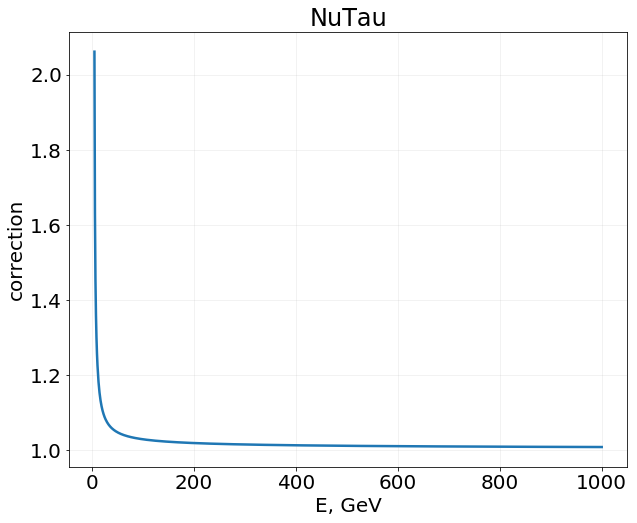

In [7]:
fig = plt.figure(figsize=(10,8), facecolor='w')
ax = plt.gca()
    
plt.title('NuTau')
ax.set_xlabel('E, GeV')
ax.set_ylabel('correction')

plt.plot(E, wght)

plt.grid()
plt.show()